# sin wave

4/4 [==============================] - 0s 5ms/step
Window Size: 5
Mean Squared Error: 0.30140706494034974
Root Mean Squared Error: 0.5490055235973038
Window Size: 10
Mean Squared Error: 0.3012241272667031
Root Mean Squared Error: 0.5488388900822382
Window Size: 15
Mean Squared Error: 0.290877647984537
Root Mean Squared Error: 0.539330740811737
Window Size: 50
Mean Squared Error: 0.3008202319895981
Root Mean Squared Error: 0.5484708123406369
Window Size: 100
Mean Squared Error: 0.3001316976371685
Root Mean Squared Error: 0.5478427672582422


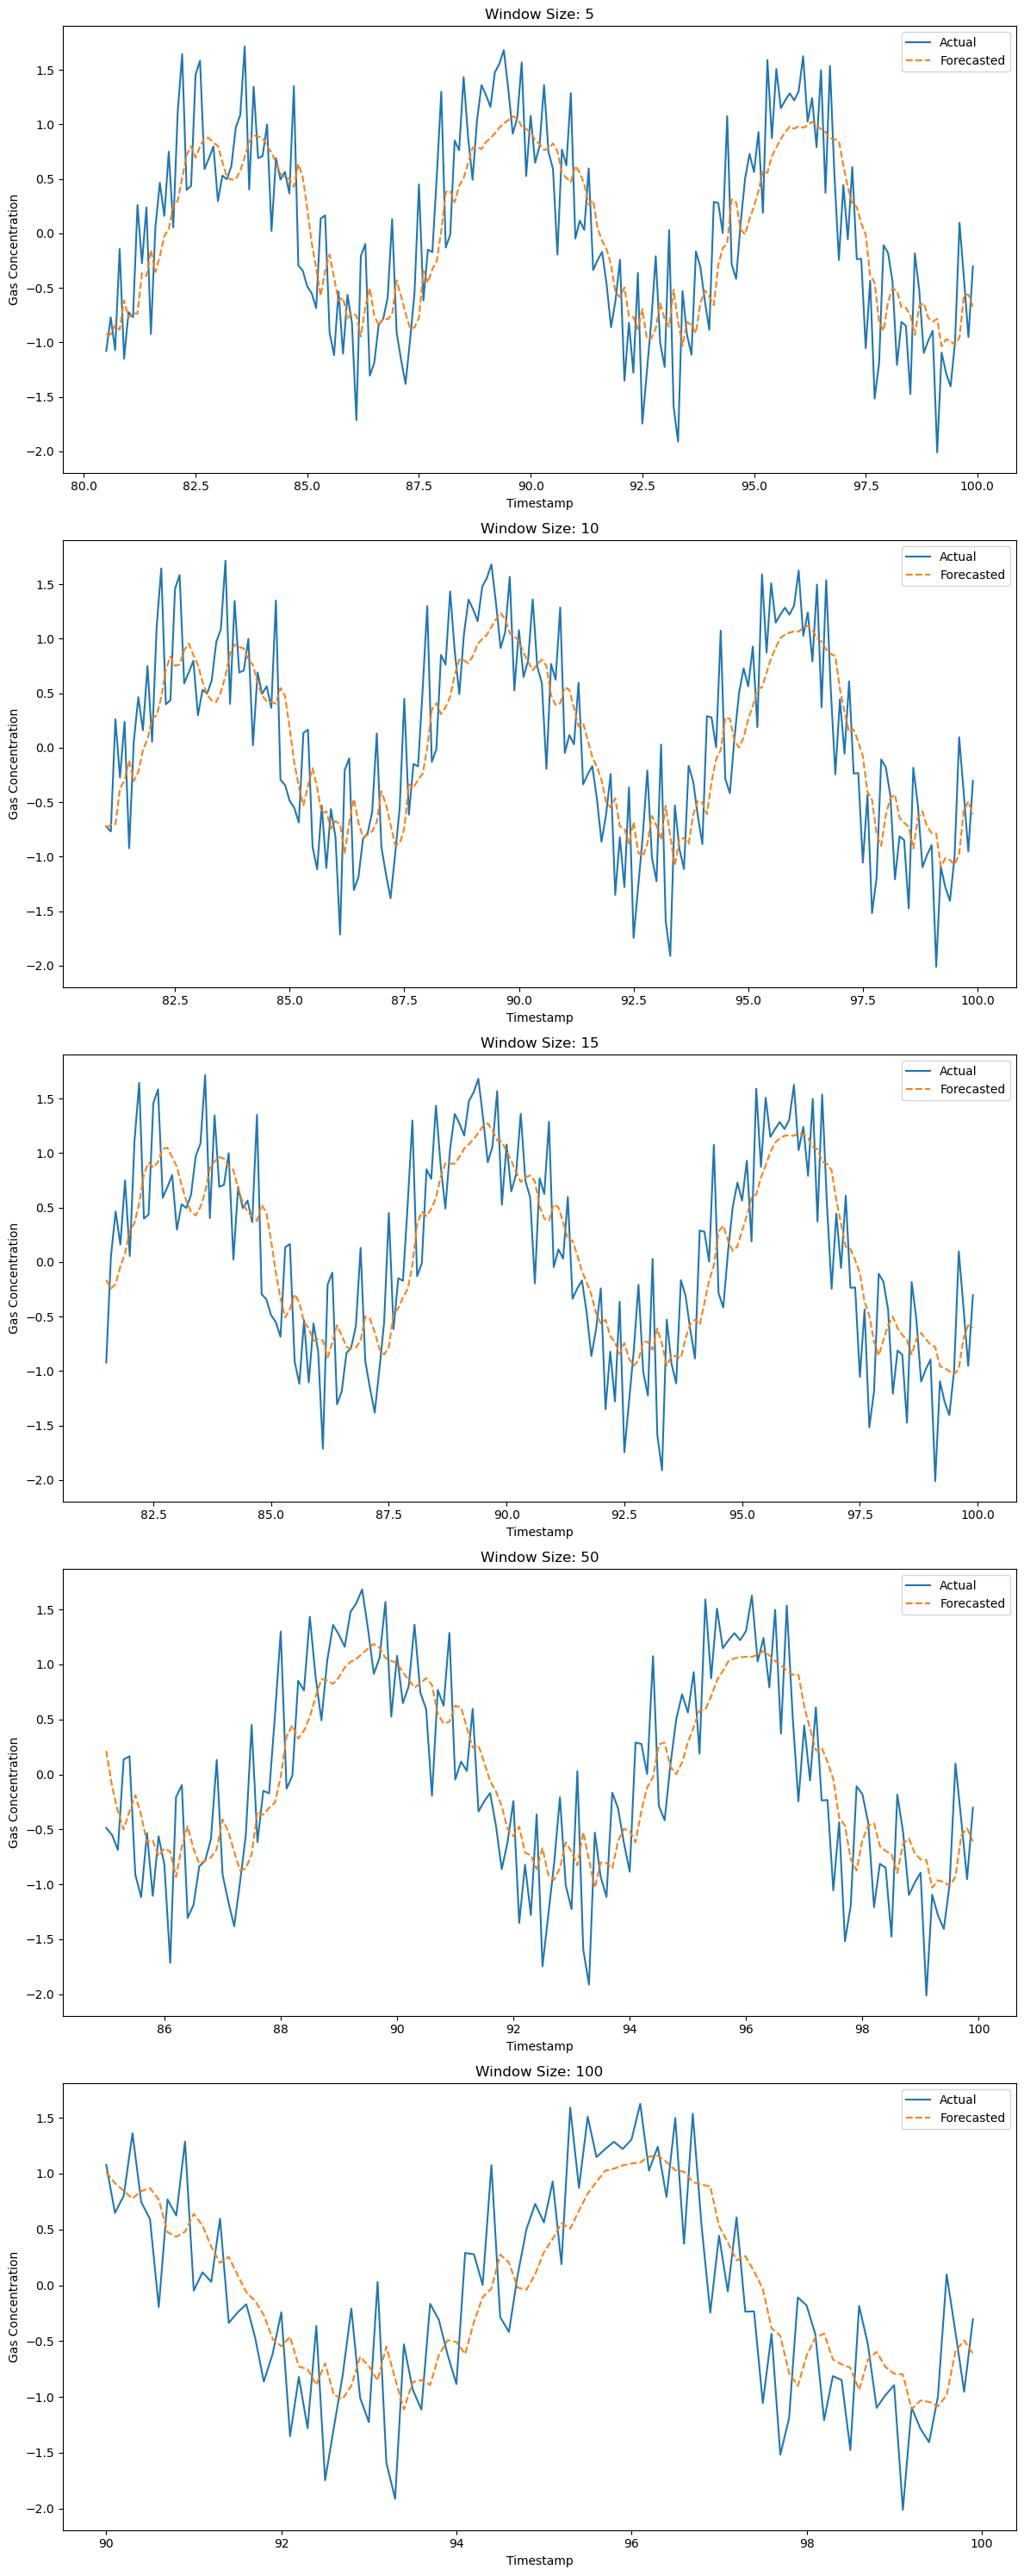

layer = 2 , units = 50


4/4 [==============================] - 1s 15ms/step
Window Size: 5
Mean Squared Error: 0.30017545439102317
Root Mean Squared Error: 0.5478827013066055
Window Size: 10
Mean Squared Error: 0.29812383423934236
Root Mean Squared Error: 0.5460071741647196
Window Size: 15
Mean Squared Error: 0.28177928268045593
Root Mean Squared Error: 0.5308288638350932
Window Size: 50
Mean Squared Error: 0.2548915166072231
Root Mean Squared Error: 0.5048678209266492
Window Size: 100
Mean Squared Error: 0.2571802286835185
Root Mean Squared Error: 0.5071294003343905


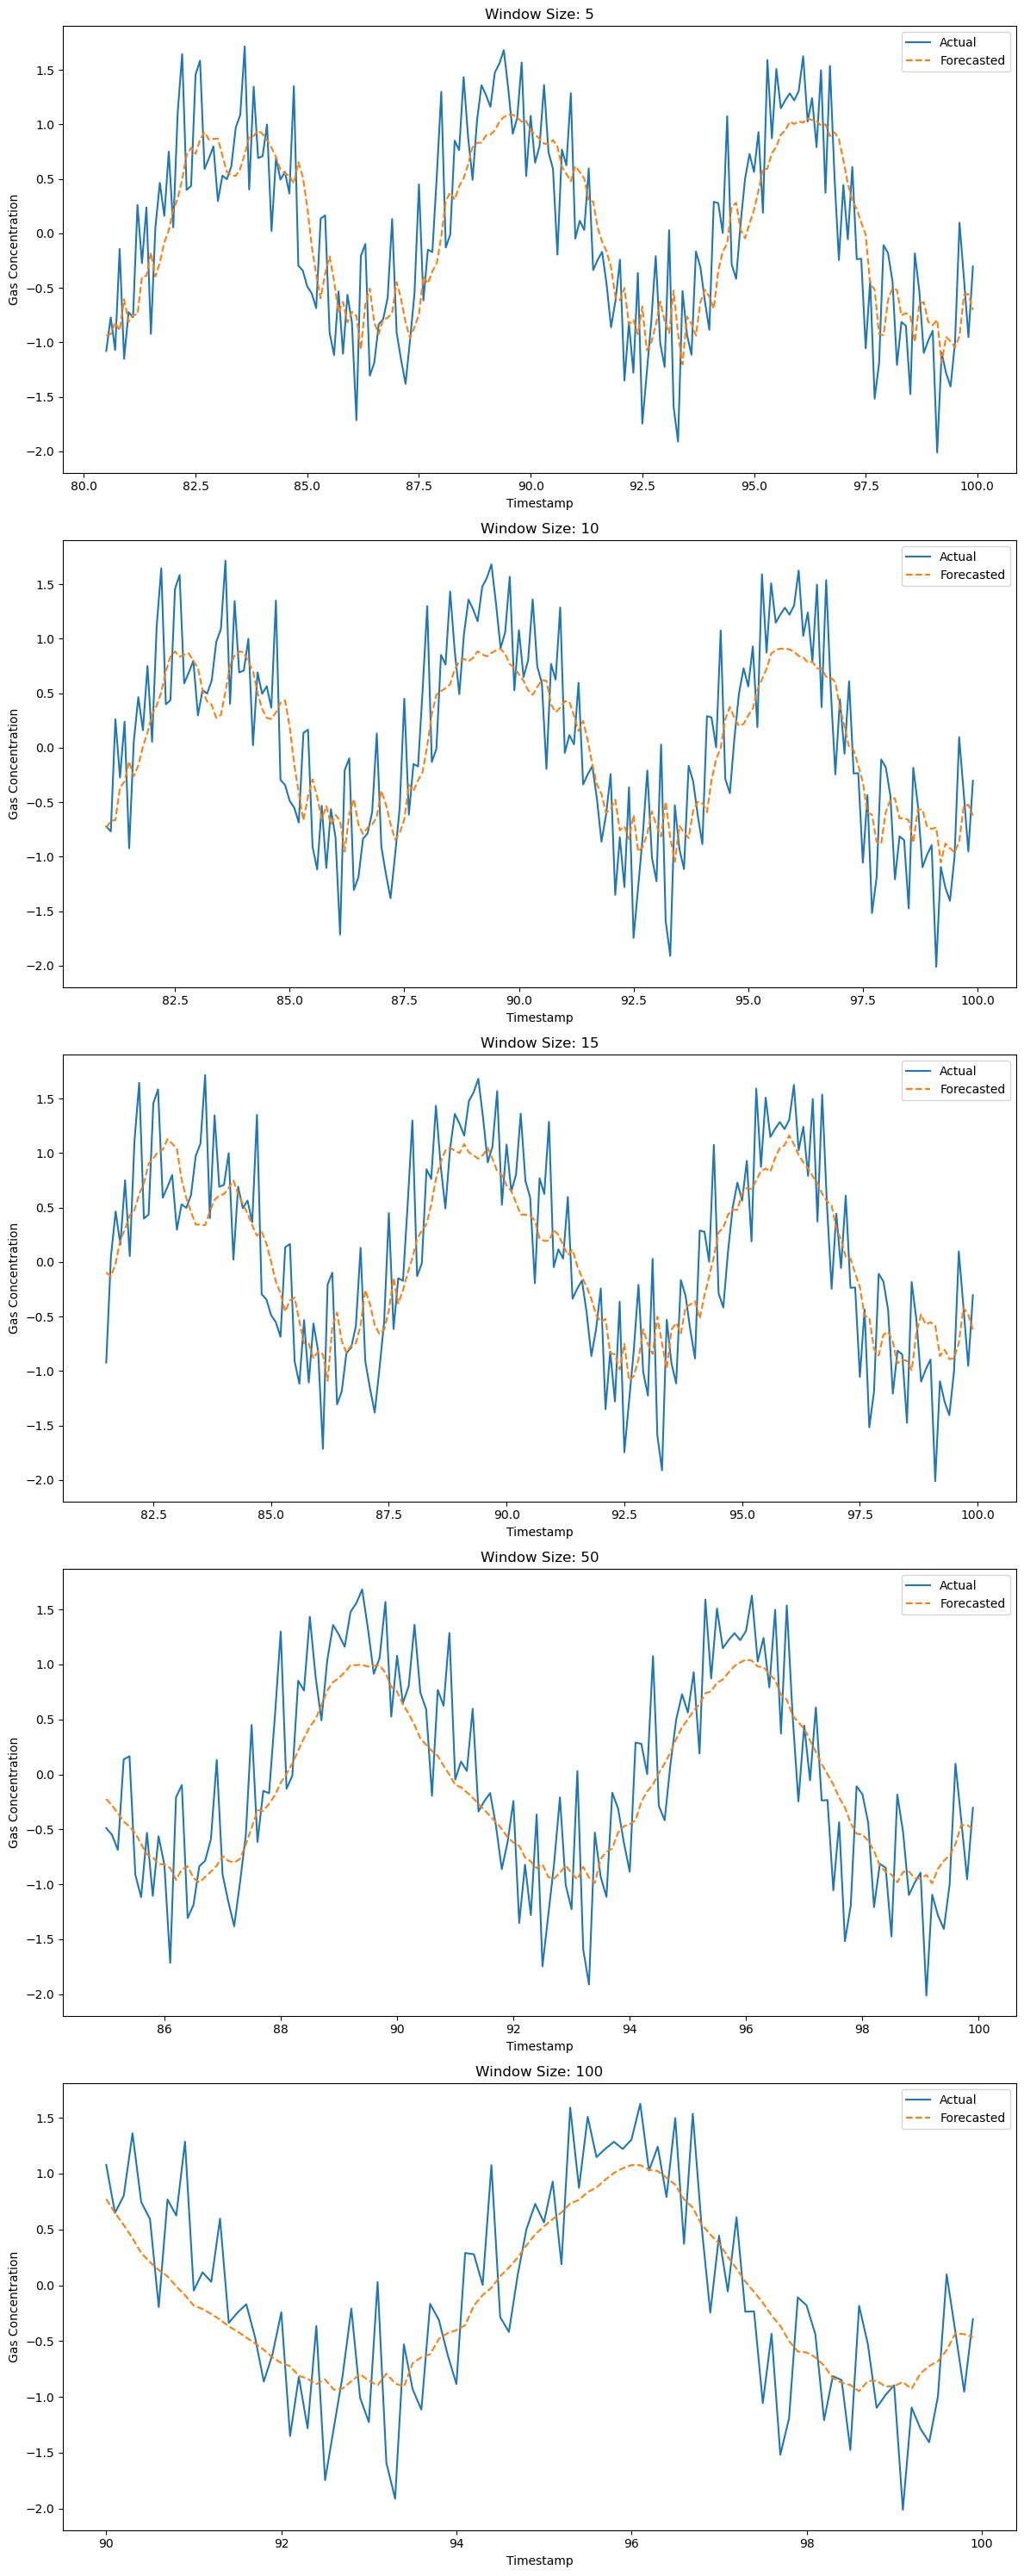

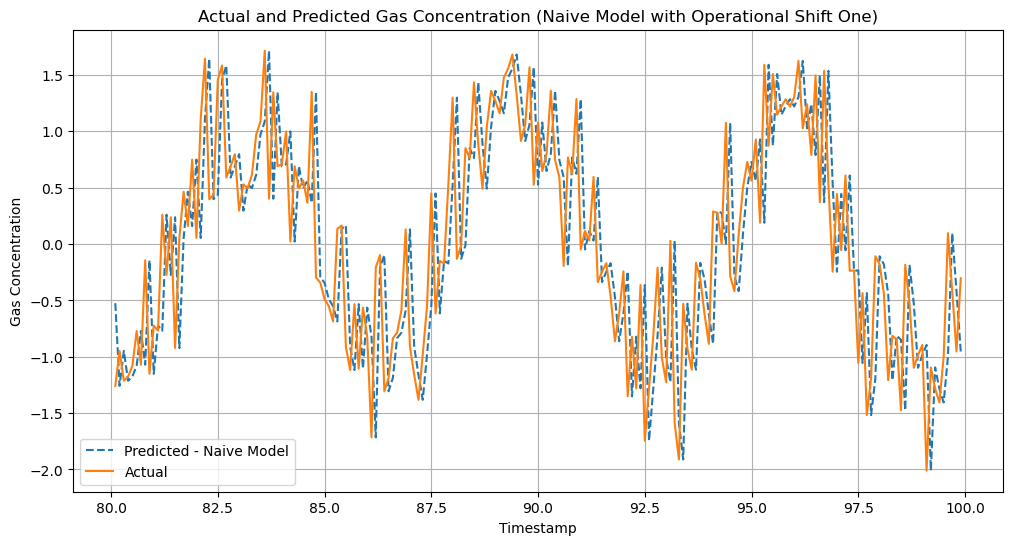

MSE value for Naive Model: 0.4458
RMSE value for Naive Model: 0.6677


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Generate a simple dataset
np.random.seed(42)
time = np.arange(0, 100, 0.1)
sin_wave = np.sin(time) + 0.5 * np.random.randn(len(time))

# Create a DataFrame
data = pd.DataFrame({'timestamp': time, 'sin_wave': sin_wave})

# Split data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# List of different window sizes to test
window_sizes = [5, 10, 15, 50, 100]

# Function to create dataset for GRU
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset['sin_wave'].values[i:(i + time_steps)]
        dataX.append(a)
        dataY.append(dataset['sin_wave'].values[i + time_steps])
    return np.array(dataX), np.array(dataY)

# Initialize arrays to store results
all_mse = []
all_rmse = []

# Build a common GRU model
def build_model(input_shape):
    model = Sequential()
    model.add(GRU(units=10, return_sequences=False, input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a subplot for plotting
fig, ax = plt.subplots(len(window_sizes), 1, figsize=(12, 6 * len(window_sizes)))

# Train and evaluate GRU model for different window sizes
for idx, time_steps in enumerate(window_sizes):
    X_train, y_train = create_dataset(train_data, time_steps)
    X_test, y_test = create_dataset(test_data, time_steps)

    # Reshape input to [samples, time_steps, features]
    input_shape = (X_train.shape[1], 1)
    X_train = np.reshape(X_train, (X_train.shape[0],) + input_shape)
    X_test = np.reshape(X_test, (X_test.shape[0],) + input_shape)

    # Build and train the model
    model = build_model(input_shape)
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

    # Predict using the trained model
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store the calculated MSE and RMSE
    all_mse.append(mse)
    all_rmse.append(rmse)

    # Plot the forecast
    ax[idx].plot(test_data['timestamp'].values[time_steps:], y_test, label='Actual')
    ax[idx].plot(test_data['timestamp'].values[time_steps:], predictions, label='Forecasted', linestyle='dashed')
    ax[idx].set_xlabel('Timestamp')
    ax[idx].set_ylabel('Gas Concentration')
    ax[idx].set_title(f'Window Size: {time_steps}')
    ax[idx].legend()

# Print evaluation metrics for each window size
for idx, time_steps in enumerate(window_sizes):
    print(f"Window Size: {time_steps}")
    print("Mean Squared Error:", all_mse[idx])
    print("Root Mean Squared Error:", all_rmse[idx])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


print("layer = 2 , units = 50\n\n")
# Initialize arrays to store results
all_mse = []
all_rmse = []

# Build a common GRU model
def build_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dense(units=1))  # 1 output unit
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a subplot for plotting
fig, ax = plt.subplots(len(window_sizes), 1, figsize=(12, 6 * len(window_sizes)))

# Train and evaluate GRU model for different window sizes
for idx, time_steps in enumerate(window_sizes):
    X_train, y_train = create_dataset(train_data, time_steps)
    X_test, y_test = create_dataset(test_data, time_steps)

    # Reshape input to [samples, time_steps, features]
    input_shape = (X_train.shape[1], 1)
    X_train = np.reshape(X_train, (X_train.shape[0],) + input_shape)
    X_test = np.reshape(X_test, (X_test.shape[0],) + input_shape)

    # Build and train the model
    model = build_model(input_shape)
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

    # Predict using the trained model
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store the calculated MSE and RMSE
    all_mse.append(mse)
    all_rmse.append(rmse)

    # Plot the forecast
    ax[idx].plot(test_data['timestamp'].values[time_steps:], y_test, label='Actual')
    ax[idx].plot(test_data['timestamp'].values[time_steps:], predictions, label='Forecasted', linestyle='dashed')
    ax[idx].set_xlabel('Timestamp')
    ax[idx].set_ylabel('Gas Concentration')
    ax[idx].set_title(f'Window Size: {time_steps}')
    ax[idx].legend()

# Print evaluation metrics for each window size
for idx, time_steps in enumerate(window_sizes):
    print(f"Window Size: {time_steps}")
    print("Mean Squared Error:", all_mse[idx])
    print("Root Mean Squared Error:", all_rmse[idx])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


# Define the naive model function
def naive_model(test_data):
    y_test_naive = np.roll(test_data, shift=1)
    y_test_naive[0] = test_data[0]  # Replace the first value with the original value
    return y_test_naive

# Apply the naive model to test data
y_test_naive = naive_model(test_data['sin_wave'].values)

# Plot the results for both sensors
plt.figure(figsize=(12, 6))
plt.plot(test_data['timestamp'].values[1:], y_test_naive[1:], label='Predicted - Naive Model', linestyle='dashed')
plt.plot(test_data['timestamp'].values[1:], test_data['sin_wave'].values[1:], label='Actual')
plt.xlabel('Timestamp')
plt.ylabel('Gas Concentration')
plt.title('Actual and Predicted Gas Concentration (Naive Model with Operational Shift One)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate MSE for the Naive Model predictions
mse_naive = mean_squared_error(test_data['sin_wave'].values[1:], y_test_naive[1:])
rmse_naive = np.sqrt(mse_naive)
print(f"MSE value for Naive Model: {mse_naive:.4f}")
print(f"RMSE value for Naive Model: {rmse_naive:.4f}")


# Cos wave

4/4 [==============================] - 0s 5ms/step
Window Size: 5
Mean Squared Error: 0.27426367571391724
Root Mean Squared Error: 0.5237018958471673
Window Size: 10
Mean Squared Error: 0.273653942455459
Root Mean Squared Error: 0.5231194342169473
Window Size: 15
Mean Squared Error: 0.27213193007640013
Root Mean Squared Error: 0.5216626592697623
Window Size: 50
Mean Squared Error: 0.26972413305157567
Root Mean Squared Error: 0.5193497213358025
Window Size: 100
Mean Squared Error: 0.2669879493125509
Root Mean Squared Error: 0.5167087664367143


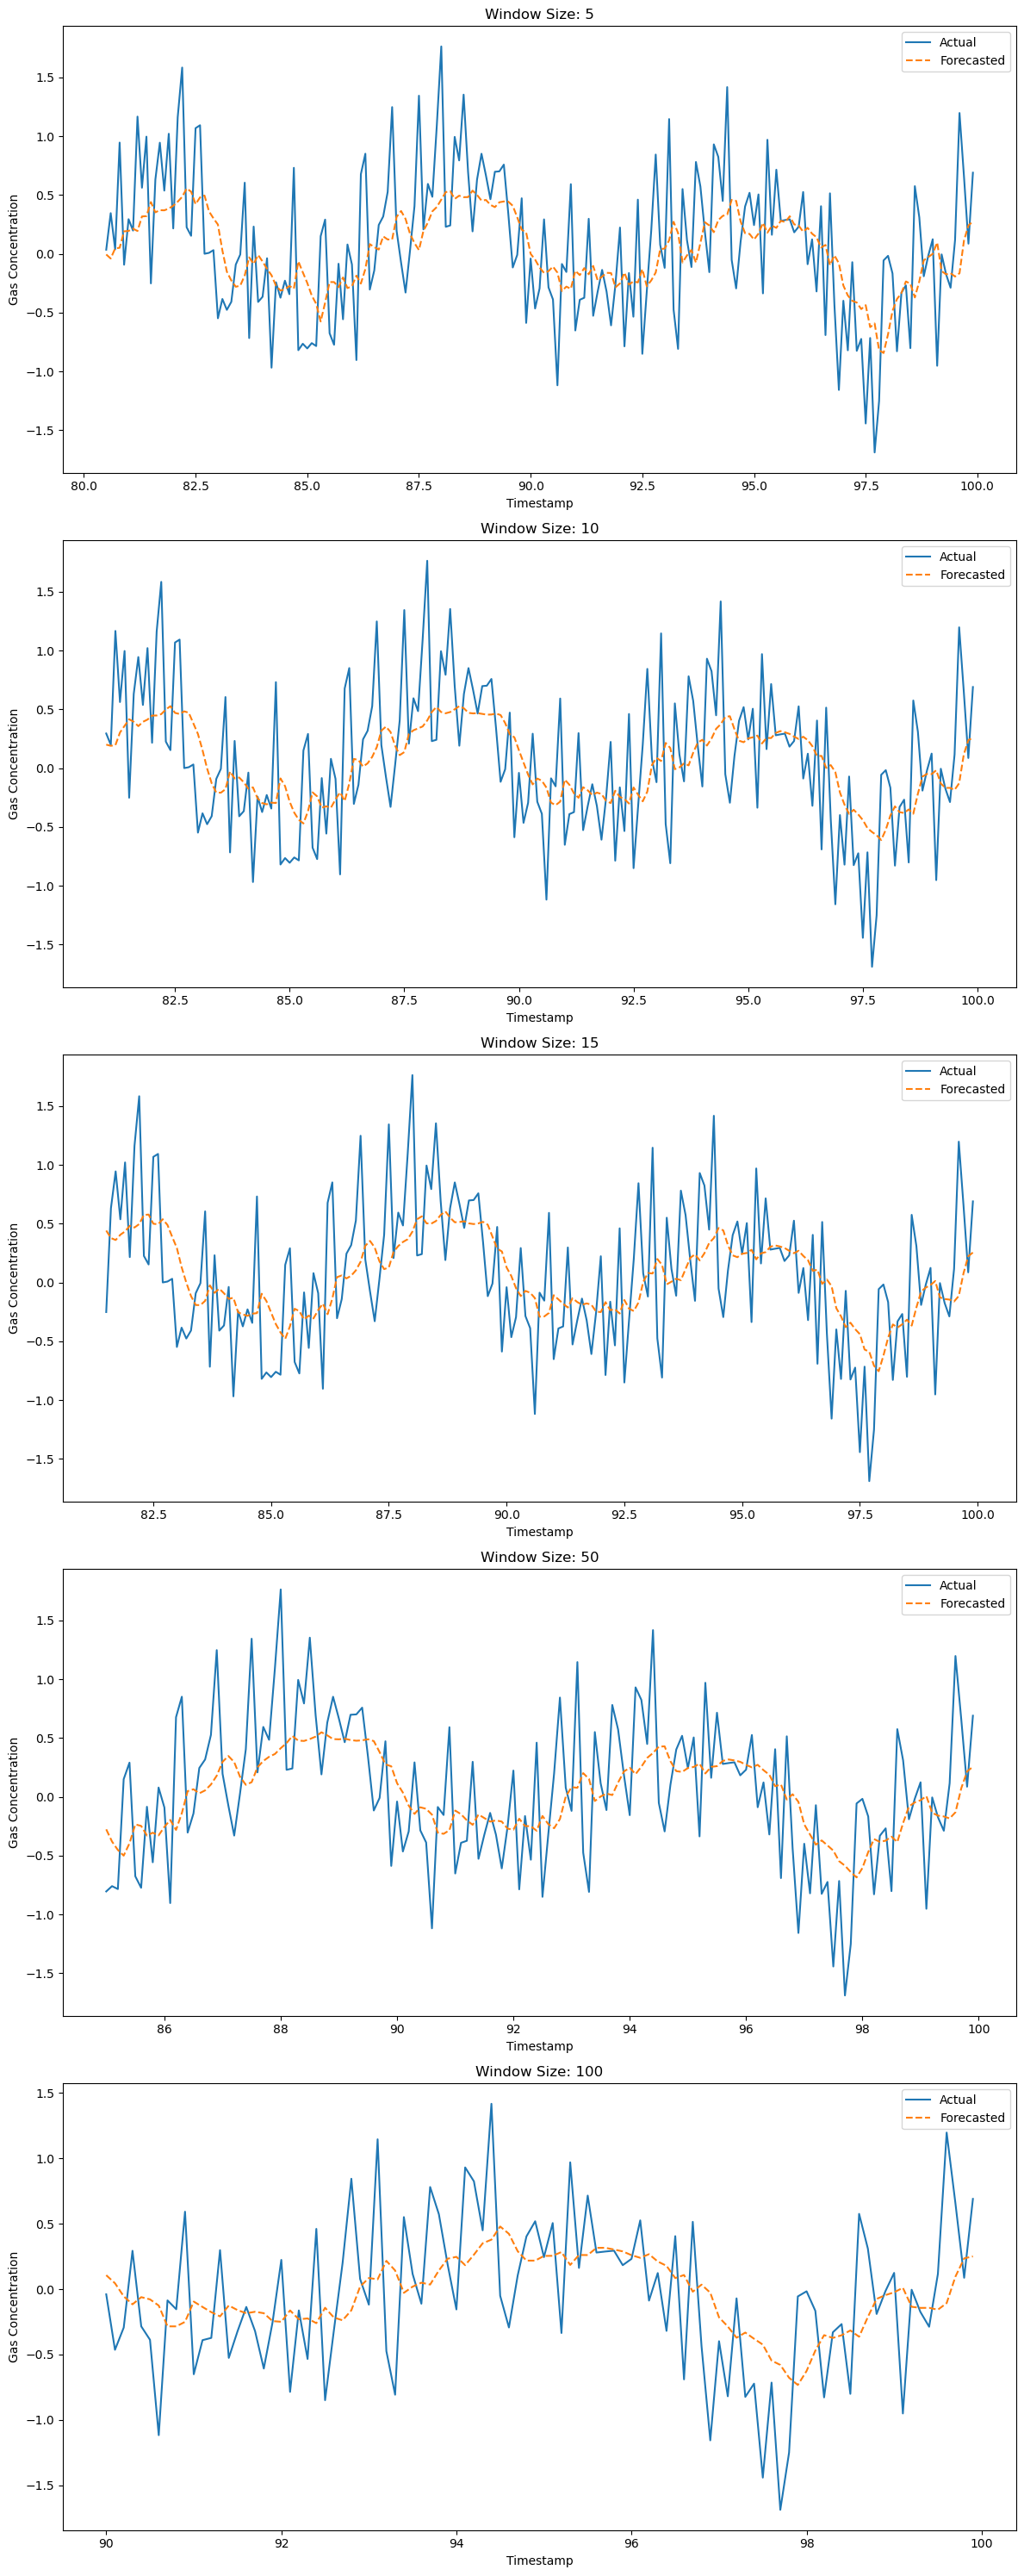

layer = 2 , units = 50


4/4 [==============================] - 1s 11ms/step
Window Size: 5
Mean Squared Error: 0.2774629933813731
Root Mean Squared Error: 0.5267475613435463
Window Size: 10
Mean Squared Error: 0.27288963964556745
Root Mean Squared Error: 0.522388399225679
Window Size: 15
Mean Squared Error: 0.2766734168926163
Root Mean Squared Error: 0.5259975445689992
Window Size: 50
Mean Squared Error: 0.270508040491351
Root Mean Squared Error: 0.5201038747128799
Window Size: 100
Mean Squared Error: 0.23772948369819885
Root Mean Squared Error: 0.4875751056998284


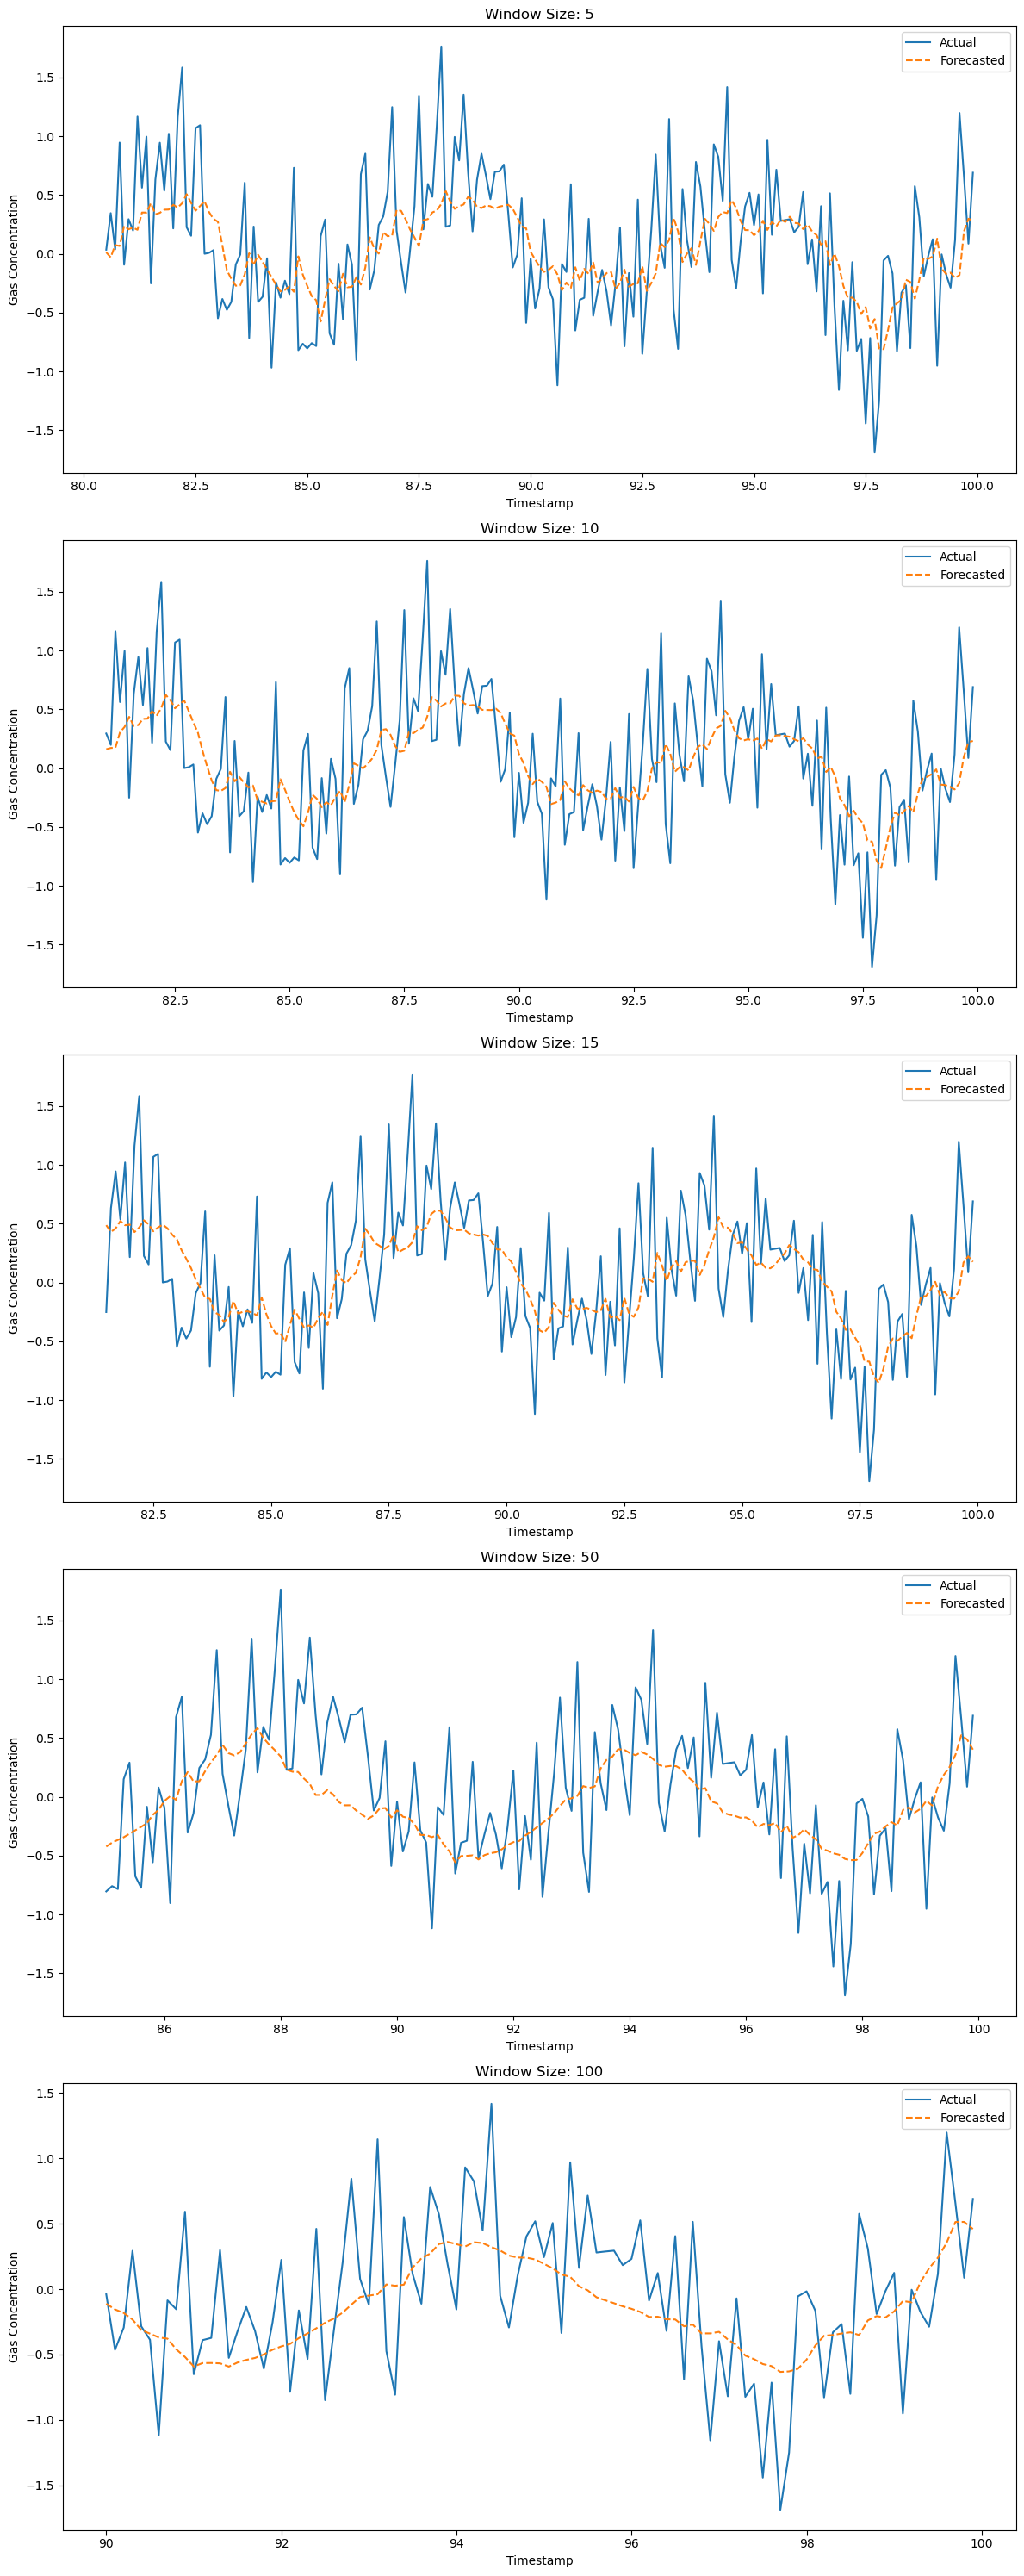

MSE value for Naive Model: 0.4411
RMSE value for Naive Model: 0.6641


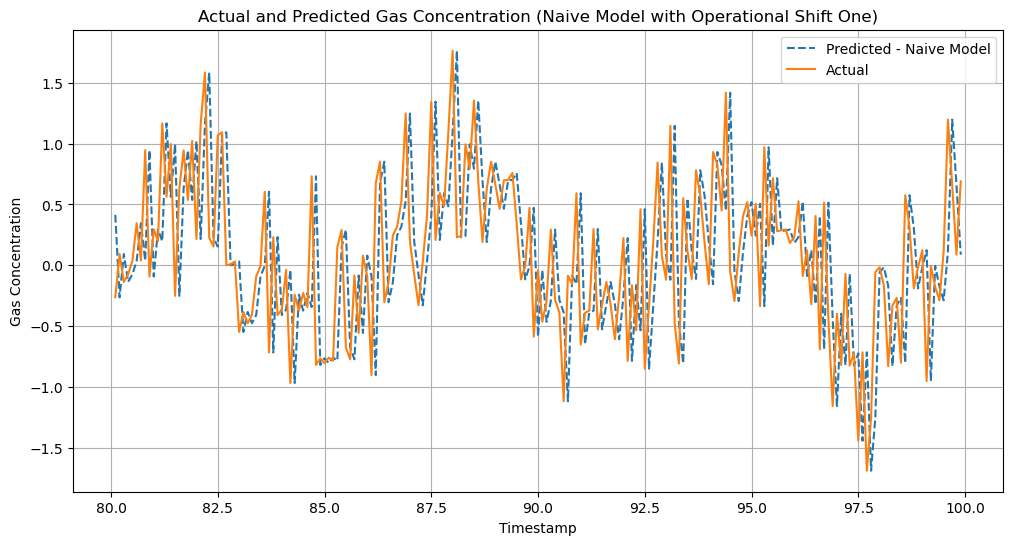

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Generate a simple dataset with a cosine wave
np.random.seed(42)
time = np.arange(0, 100, 0.1)
cos_wave = 0.5 * np.cos(time) + 0.5 * np.random.randn(len(time))

# Create a DataFrame
data = pd.DataFrame({'timestamp': time, 'Cos_Wave': cos_wave})

# Split data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# List of different window sizes to test
window_sizes = [5, 10, 15, 50, 100]

# Function to create dataset for GRU
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset['Cos_Wave'].values[i:(i + time_steps)]
        dataX.append(a)
        dataY.append(dataset['Cos_Wave'].values[i + time_steps])
    return np.array(dataX), np.array(dataY)

# Initialize arrays to store results
all_mse = []
all_rmse = []

# Build a common GRU model
def build_model(input_shape):
    model = Sequential()
    model.add(GRU(units=10, return_sequences=False, input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a subplot for plotting
fig, ax = plt.subplots(len(window_sizes), 1, figsize=(12, 6 * len(window_sizes)))

# Train and evaluate GRU model for different window sizes
for idx, time_steps in enumerate(window_sizes):
    X_train, y_train = create_dataset(train_data, time_steps)
    X_test, y_test = create_dataset(test_data, time_steps)

    # Reshape input to [samples, time_steps, features]
    input_shape = (X_train.shape[1], 1)
    X_train = np.reshape(X_train, (X_train.shape[0],) + input_shape)
    X_test = np.reshape(X_test, (X_test.shape[0],) + input_shape)

    # Build and train the model
    model = build_model(input_shape)
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

    # Predict using the trained model
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store the calculated MSE and RMSE
    all_mse.append(mse)
    all_rmse.append(rmse)

    # Plot the forecast
    ax[idx].plot(test_data['timestamp'].values[time_steps:], y_test, label='Actual')
    ax[idx].plot(test_data['timestamp'].values[time_steps:], predictions, label='Forecasted', linestyle='dashed')
    ax[idx].set_xlabel('Timestamp')
    ax[idx].set_ylabel('Gas Concentration')
    ax[idx].set_title(f'Window Size: {time_steps}')
    ax[idx].legend()

# Print evaluation metrics for each window size
for idx, time_steps in enumerate(window_sizes):
    print(f"Window Size: {time_steps}")
    print("Mean Squared Error:", all_mse[idx])
    print("Root Mean Squared Error:", all_rmse[idx])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


print("layer = 2 , units = 50\n\n")
# Initialize arrays to store results
all_mse = []
all_rmse = []

# Build a common GRU model
def build_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dense(units=1))  # 1 output unit
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a subplot for plotting
fig, ax = plt.subplots(len(window_sizes), 1, figsize=(12, 6 * len(window_sizes)))

# Train and evaluate GRU model for different window sizes
for idx, time_steps in enumerate(window_sizes):
    X_train, y_train = create_dataset(train_data, time_steps)
    X_test, y_test = create_dataset(test_data, time_steps)

    # Reshape input to [samples, time_steps, features]
    input_shape = (X_train.shape[1], 1)
    X_train = np.reshape(X_train, (X_train.shape[0],) + input_shape)
    X_test = np.reshape(X_test, (X_test.shape[0],) + input_shape)

    # Build and train the model
    model = build_model(input_shape)
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

    # Predict using the trained model
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store the calculated MSE and RMSE
    all_mse.append(mse)
    all_rmse.append(rmse)

    # Plot the forecast
    ax[idx].plot(test_data['timestamp'].values[time_steps:], y_test, label='Actual')
    ax[idx].plot(test_data['timestamp'].values[time_steps:], predictions, label='Forecasted', linestyle='dashed')
    ax[idx].set_xlabel('Timestamp')
    ax[idx].set_ylabel('Gas Concentration')
    ax[idx].set_title(f'Window Size: {time_steps}')
    ax[idx].legend()

# Print evaluation metrics for each window size
for idx, time_steps in enumerate(window_sizes):
    print(f"Window Size: {time_steps}")
    print("Mean Squared Error:", all_mse[idx])
    print("Root Mean Squared Error:", all_rmse[idx])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


# Define the naive model function
def naive_model(test_data):
    y_test_naive = np.roll(test_data, shift=1)
    y_test_naive[0] = test_data[0]  # Replace the first value with the original value
    return y_test_naive

# Apply the naive model to test data
y_test_naive = naive_model(test_data['Cos_Wave'].values)

# Plot the results for both sensors
plt.figure(figsize=(12, 6))
plt.plot(test_data['timestamp'].values[1:], y_test_naive[1:], label='Predicted - Naive Model', linestyle='dashed')
plt.plot(test_data['timestamp'].values[1:], test_data['Cos_Wave'].values[1:], label='Actual')
plt.xlabel('Timestamp')
plt.ylabel('Gas Concentration')
plt.title('Actual and Predicted Gas Concentration (Naive Model with Operational Shift One)')
plt.legend()
plt.grid(True)


# Calculate MSE for the Naive Model predictions
mse_naive = mean_squared_error(test_data['Cos_Wave'].values[1:], y_test_naive[1:])
rmse_naive = np.sqrt(mse_naive)
print(f"MSE value for Naive Model: {mse_naive:.4f}")
print(f"RMSE value for Naive Model: {rmse_naive:.4f}")


# Combine sin and cos wave

4/4 [==============================] - 1s 5ms/step
Window Size: 5
Mean Squared Error: 0.2730908127025862
Root Mean Squared Error: 0.5225809149811981
Window Size: 10
Mean Squared Error: 0.27274328806385323
Root Mean Squared Error: 0.5222483011593749
Window Size: 15
Mean Squared Error: 0.27203550880802774
Root Mean Squared Error: 0.5215702338209378
Window Size: 50
Mean Squared Error: 0.24333496365836324
Root Mean Squared Error: 0.4932899387361993
Window Size: 100
Mean Squared Error: 0.2663529329560086
Root Mean Squared Error: 0.5160939187357361


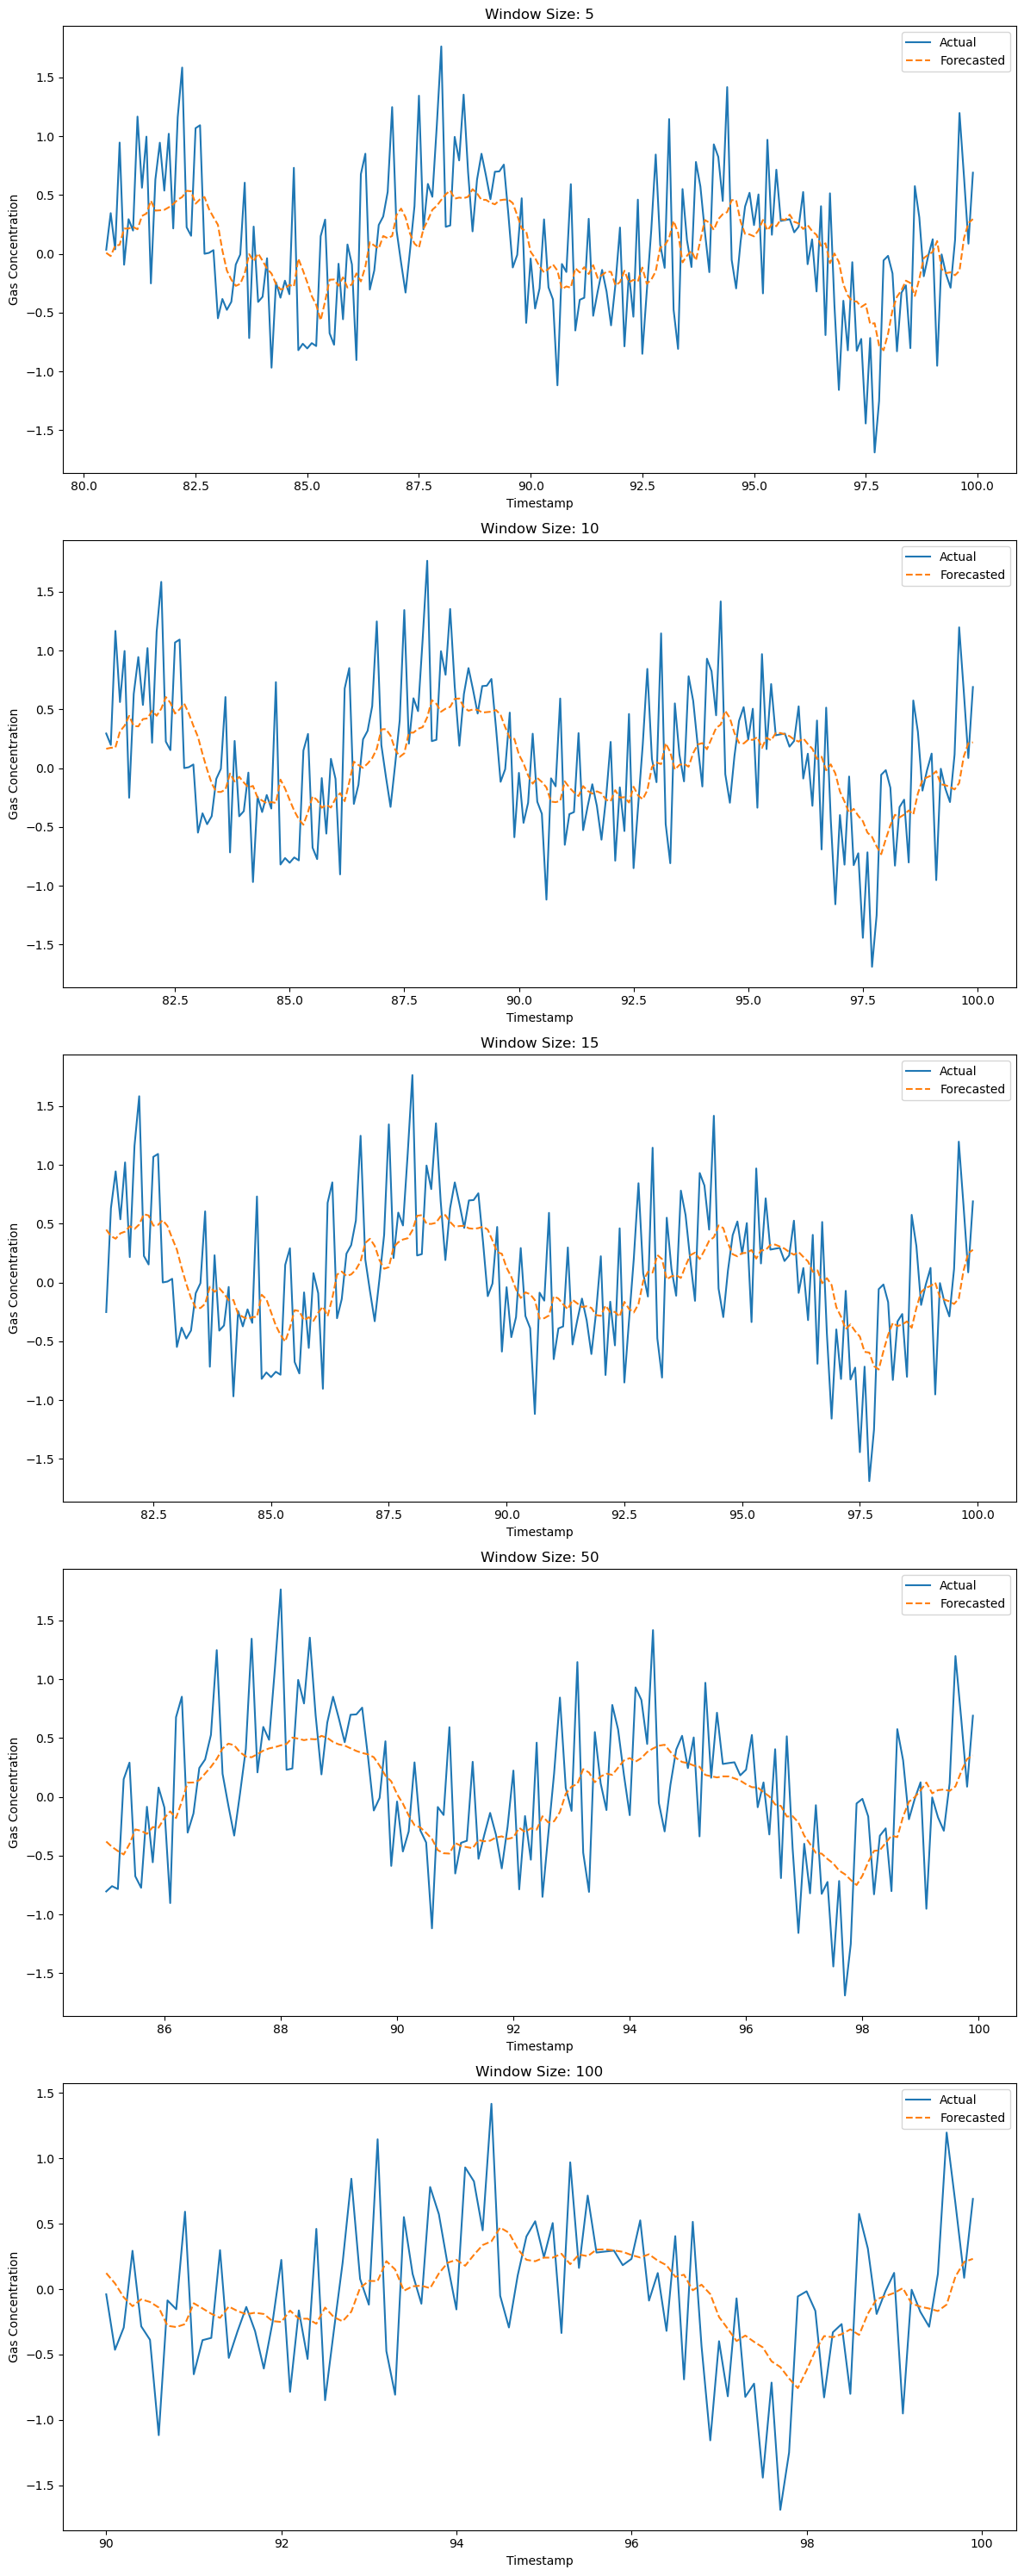

layer = 2 , units = 50


4/4 [==============================] - 1s 15ms/step
Window Size: 5
Mean Squared Error: 0.27704169110449944
Root Mean Squared Error: 0.526347500330817
Window Size: 10
Mean Squared Error: 0.2733181257825161
Root Mean Squared Error: 0.5227983605392389
Window Size: 15
Mean Squared Error: 0.2690078450061939
Root Mean Squared Error: 0.5186596620195115
Window Size: 50
Mean Squared Error: 0.2602385029809002
Root Mean Squared Error: 0.5101357691643472
Window Size: 100
Mean Squared Error: 0.24673768530253998
Root Mean Squared Error: 0.49672697259414045


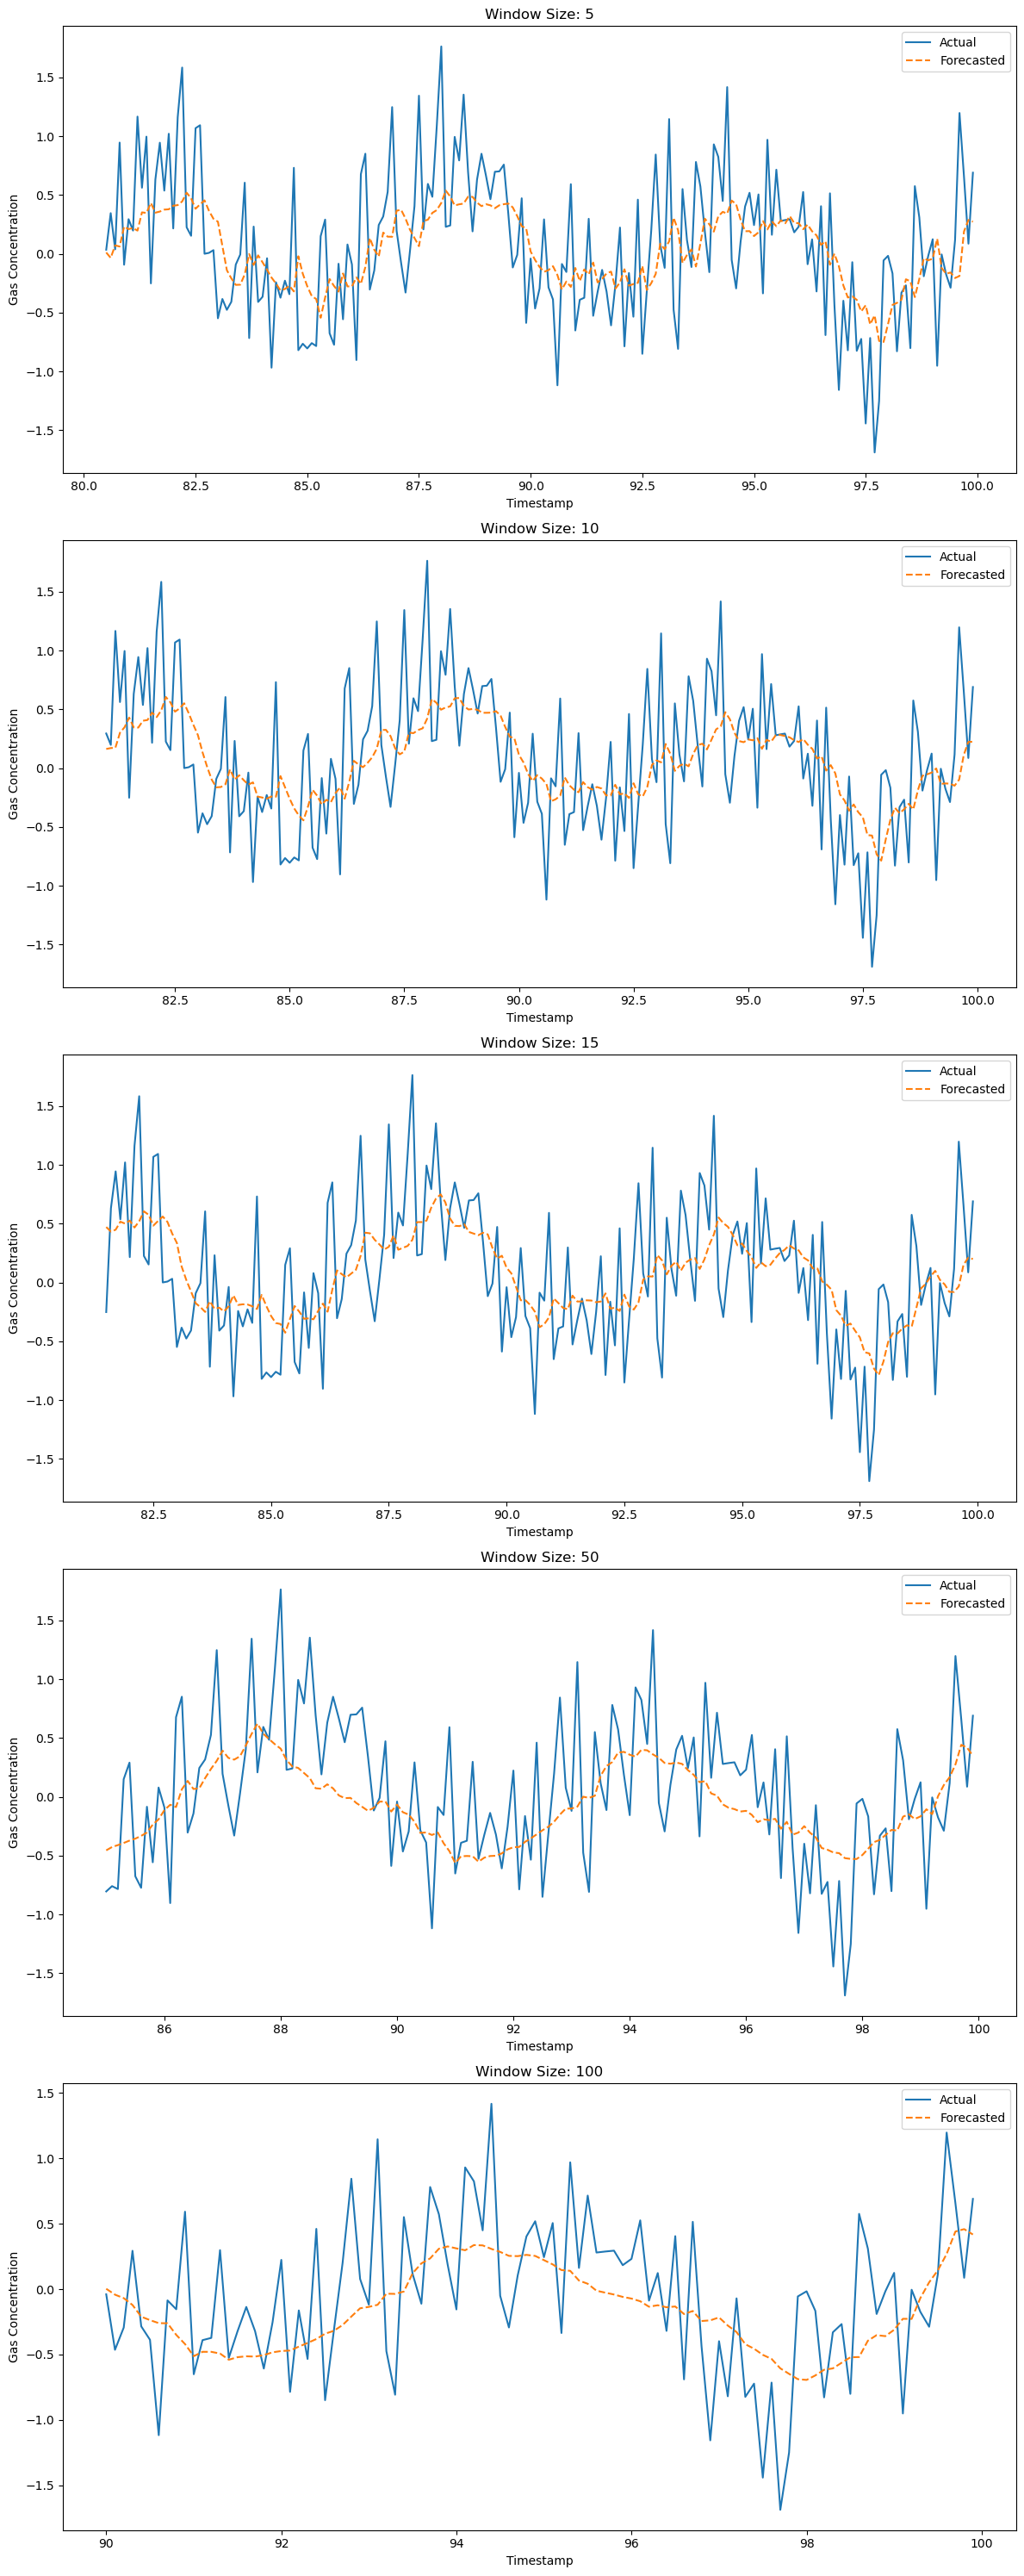

MSE value for Naive Model: 0.4411
RMSE value for Naive Model: 0.6641


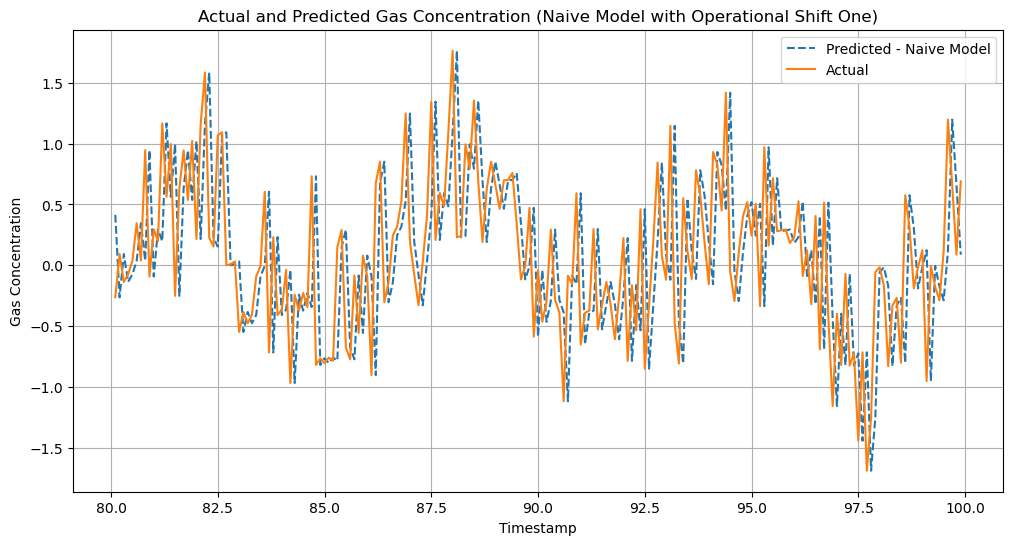

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Generate a simple dataset with a cosine wave
np.random.seed(42)
time = np.arange(0, 100, 0.1)
cos_wave = 0.5 * np.cos(time) + 0.5 * np.random.randn(len(time))

# Create a DataFrame
data = pd.DataFrame({'timestamp': time, 'Combined_Wave': cos_wave})

# Split data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# List of different window sizes to test
window_sizes = [5, 10, 15, 50, 100]

# Function to create dataset for GRU
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset['Combined_Wave'].values[i:(i + time_steps)]
        dataX.append(a)
        dataY.append(dataset['Combined_Wave'].values[i + time_steps])
    return np.array(dataX), np.array(dataY)

# Initialize arrays to store results
all_mse = []
all_rmse = []

# Build a common GRU model
def build_model(input_shape):
    model = Sequential()
    model.add(GRU(units=10, return_sequences=False, input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a subplot for plotting
fig, ax = plt.subplots(len(window_sizes), 1, figsize=(12, 6 * len(window_sizes)))

# Train and evaluate GRU model for different window sizes
for idx, time_steps in enumerate(window_sizes):
    X_train, y_train = create_dataset(train_data, time_steps)
    X_test, y_test = create_dataset(test_data, time_steps)

    # Reshape input to [samples, time_steps, features]
    input_shape = (X_train.shape[1], 1)
    X_train = np.reshape(X_train, (X_train.shape[0],) + input_shape)
    X_test = np.reshape(X_test, (X_test.shape[0],) + input_shape)

    # Build and train the model
    model = build_model(input_shape)
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

    # Predict using the trained model
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store the calculated MSE and RMSE
    all_mse.append(mse)
    all_rmse.append(rmse)

    # Plot the forecast
    ax[idx].plot(test_data['timestamp'].values[time_steps:], y_test, label='Actual')
    ax[idx].plot(test_data['timestamp'].values[time_steps:], predictions, label='Forecasted', linestyle='dashed')
    ax[idx].set_xlabel('Timestamp')
    ax[idx].set_ylabel('Gas Concentration')
    ax[idx].set_title(f'Window Size: {time_steps}')
    ax[idx].legend()

# Print evaluation metrics for each window size
for idx, time_steps in enumerate(window_sizes):
    print(f"Window Size: {time_steps}")
    print("Mean Squared Error:", all_mse[idx])
    print("Root Mean Squared Error:", all_rmse[idx])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


print("layer = 2 , units = 50\n\n")
# Initialize arrays to store results
all_mse = []
all_rmse = []

# Build a common GRU model
def build_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dense(units=1))  # 1 output unit
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a subplot for plotting
fig, ax = plt.subplots(len(window_sizes), 1, figsize=(12, 6 * len(window_sizes)))

# Train and evaluate GRU model for different window sizes
for idx, time_steps in enumerate(window_sizes):
    X_train, y_train = create_dataset(train_data, time_steps)
    X_test, y_test = create_dataset(test_data, time_steps)

    # Reshape input to [samples, time_steps, features]
    input_shape = (X_train.shape[1], 1)
    X_train = np.reshape(X_train, (X_train.shape[0],) + input_shape)
    X_test = np.reshape(X_test, (X_test.shape[0],) + input_shape)

    # Build and train the model
    model = build_model(input_shape)
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

    # Predict using the trained model
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store the calculated MSE and RMSE
    all_mse.append(mse)
    all_rmse.append(rmse)

    # Plot the forecast
    ax[idx].plot(test_data['timestamp'].values[time_steps:], y_test, label='Actual')
    ax[idx].plot(test_data['timestamp'].values[time_steps:], predictions, label='Forecasted', linestyle='dashed')
    ax[idx].set_xlabel('Timestamp')
    ax[idx].set_ylabel('Gas Concentration')
    ax[idx].set_title(f'Window Size: {time_steps}')
    ax[idx].legend()

# Print evaluation metrics for each window size
for idx, time_steps in enumerate(window_sizes):
    print(f"Window Size: {time_steps}")
    print("Mean Squared Error:", all_mse[idx])
    print("Root Mean Squared Error:", all_rmse[idx])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


# Define the naive model function
def naive_model(test_data):
    y_test_naive = np.roll(test_data, shift=1)
    y_test_naive[0] = test_data[0]  # Replace the first value with the original value
    return y_test_naive

# Apply the naive model to test data
y_test_naive = naive_model(test_data['Combined_Wave'].values)

# Plot the results for both sensors
plt.figure(figsize=(12, 6))
plt.plot(test_data['timestamp'].values[1:], y_test_naive[1:], label='Predicted - Naive Model', linestyle='dashed')
plt.plot(test_data['timestamp'].values[1:], test_data['Combined_Wave'].values[1:], label='Actual')
plt.xlabel('Timestamp')
plt.ylabel('Gas Concentration')
plt.title('Actual and Predicted Gas Concentration (Naive Model with Operational Shift One)')
plt.legend()
plt.grid(True)


# Calculate MSE for the Naive Model predictions
mse_naive = mean_squared_error(test_data['Combined_Wave'].values[1:], y_test_naive[1:])
rmse_naive = np.sqrt(mse_naive)
print(f"MSE value for Naive Model: {mse_naive:.4f}")
print(f"RMSE value for Naive Model: {rmse_naive:.4f}")


# Day 15 MQ136_CO (Used dataset from our experiment)

1868/1868 [==============================] - 8s 4ms/step
Window Size: 5
Mean Squared Error: 19099.801759939764
Root Mean Squared Error: 138.20203240162485
Window Size: 10
Mean Squared Error: 16737.511845731362
Root Mean Squared Error: 129.37353611048653
Window Size: 15
Mean Squared Error: 20419.96747175619
Root Mean Squared Error: 142.89845160727316
Window Size: 50
Mean Squared Error: 22054.841116728214
Root Mean Squared Error: 148.5087240424892
Window Size: 100
Mean Squared Error: 16414.906745325086
Root Mean Squared Error: 128.12067259160438


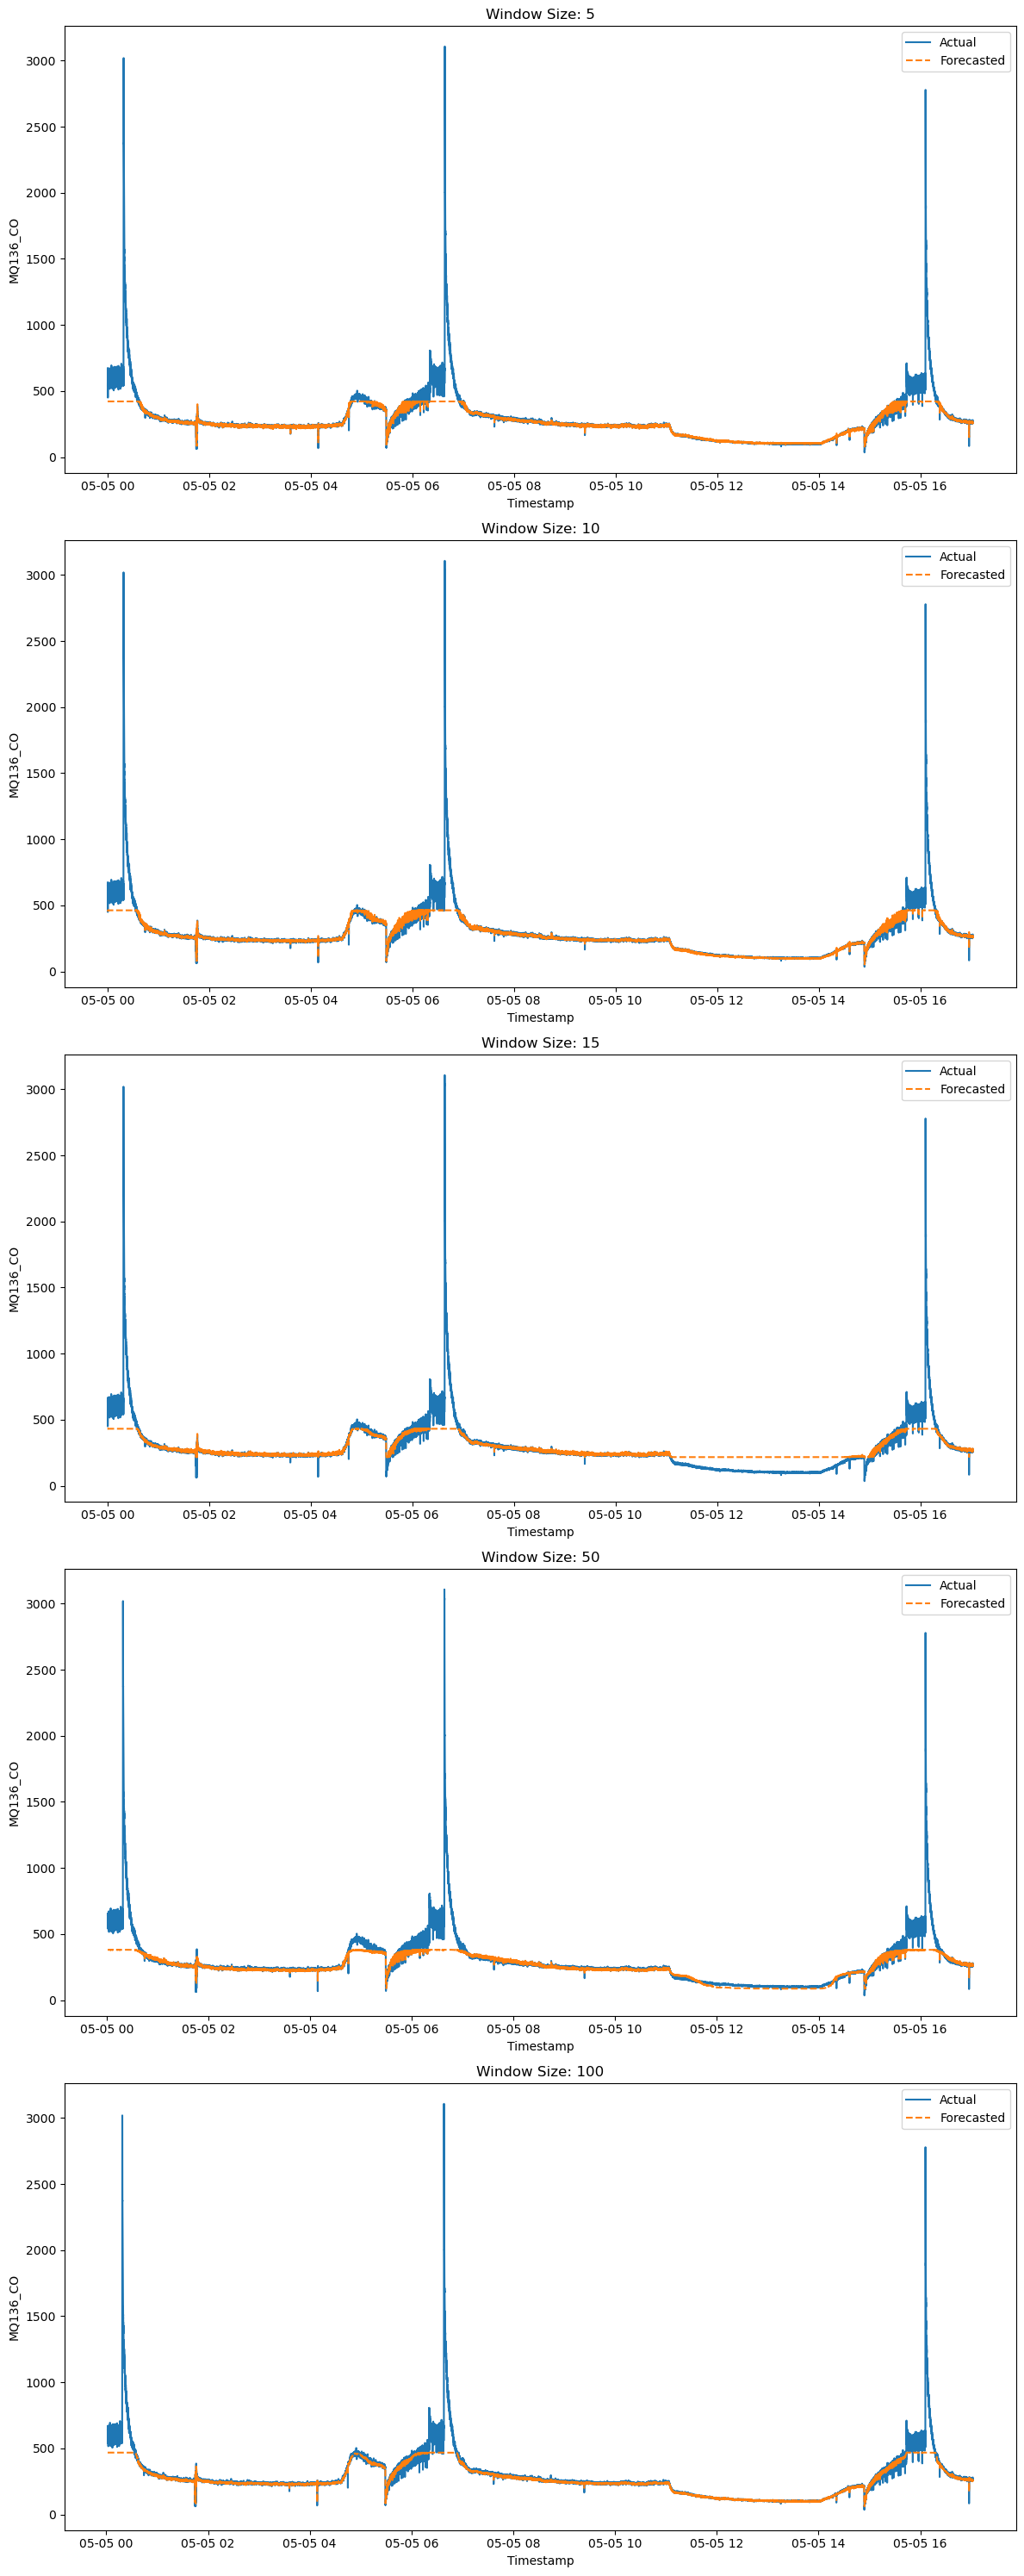

layer = 2 , units = 50


1868/1868 [==============================] - 32s 17ms/step
Window Size: 5
Mean Squared Error: 2937.265415857014
Root Mean Squared Error: 54.19654431656149
Window Size: 10
Mean Squared Error: 3939.862820907597
Root Mean Squared Error: 62.76832657405801
Window Size: 15
Mean Squared Error: 3005.8773746928027
Root Mean Squared Error: 54.82588234303943
Window Size: 50
Mean Squared Error: 3173.5724786652663
Root Mean Squared Error: 56.334469720281085
Window Size: 100
Mean Squared Error: 3122.0413676798275
Root Mean Squared Error: 55.87523035907617


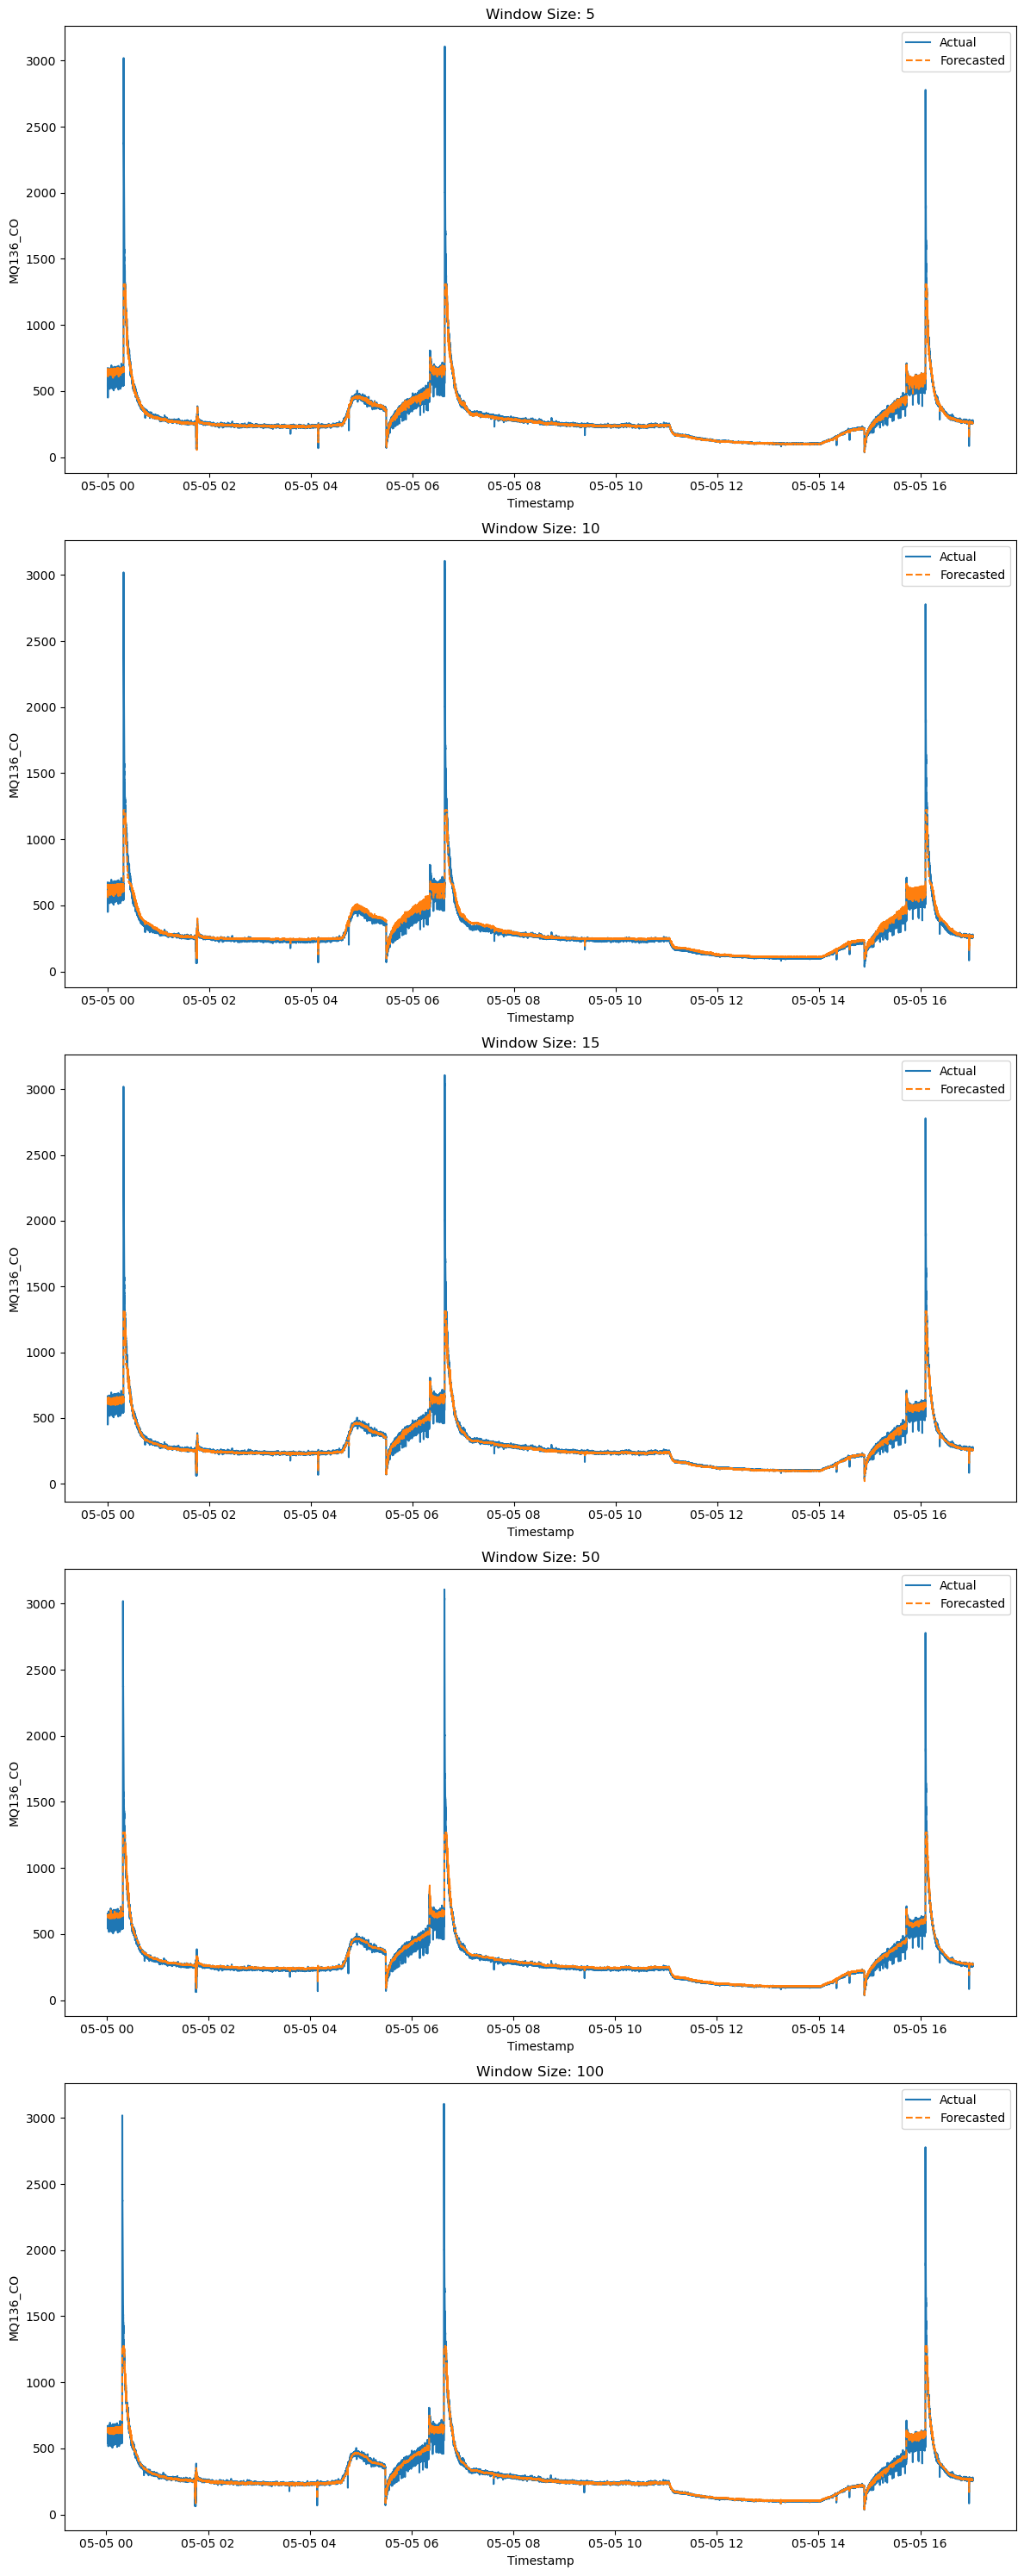

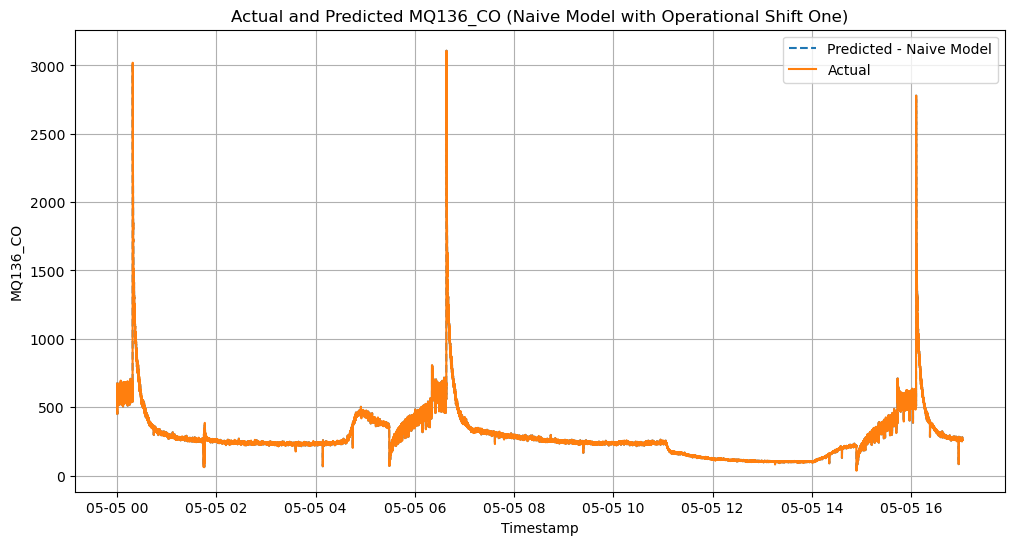

MSE value for Naive Model: 394.5557
RMSE value for Naive Model: 19.8634


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load and preprocess your data
data = pd.read_csv('data4.csv')[
    83797 + 31276 + 83937 + 84242 + 83491 + 84297 + 84124 + 84227 + 84240 + 84322 + 84242 
    + 83909 + 83742 + 84310: 
    83797 + 31276 + 83937 + 84242 + 83491 + 84297 + 84124 + 84227 + 84240 + 84322 + 84242 
    + 83909 + 83742 + 84310 + 59853
]
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
ts_data = data.set_index('timestamp')['MQ136_CO']

# List of different window sizes to test
window_sizes = [5, 10, 15, 50, 100]

# Function to create dataset for GRU
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset.values[i:(i + time_steps)]
        dataX.append(a)
        dataY.append(dataset.values[i + time_steps])
    return np.array(dataX), np.array(dataY)

# Initialize arrays to store results
all_mse = []
all_rmse = []

# Build a common GRU model
def build_model(input_shape):
    model = Sequential()
    model.add(GRU(units=10, return_sequences=False, input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a subplot for plotting
fig, ax = plt.subplots(len(window_sizes), 1, figsize=(12, 6 * len(window_sizes)))

# Train and evaluate GRU model for different window sizes
for idx, time_steps in enumerate(window_sizes):
    X_train, y_train = create_dataset(ts_data, time_steps)
    X_test, y_test = create_dataset(ts_data, time_steps)

    # Reshape input to [samples, time_steps, features]
    input_shape = (X_train.shape[1], 1)
    X_train = np.reshape(X_train, (X_train.shape[0],) + input_shape)
    X_test = np.reshape(X_test, (X_test.shape[0],) + input_shape)

    # Build and train the model
    model = build_model(input_shape)
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

    # Predict using the trained model
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store the calculated MSE and RMSE
    all_mse.append(mse)
    all_rmse.append(rmse)

    # Plot the forecast
    ax[idx].plot(data['timestamp'].values[time_steps:], y_test, label='Actual')
    ax[idx].plot(data['timestamp'].values[time_steps:], predictions, label='Forecasted', linestyle='dashed')
    ax[idx].set_xlabel('Timestamp')
    ax[idx].set_ylabel('MQ136_CO')
    ax[idx].set_title(f'Window Size: {time_steps}')
    ax[idx].legend()

# Print evaluation metrics for each window size
for idx, time_steps in enumerate(window_sizes):
    print(f"Window Size: {time_steps}")
    print("Mean Squared Error:", all_mse[idx])
    print("Root Mean Squared Error:", all_rmse[idx])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


print("layer = 2 , units = 50\n\n")
# Initialize arrays to store results
all_mse = []
all_rmse = []

# Build a common GRU model
def build_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dense(units=1))  # 1 output unit
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a subplot for plotting
fig, ax = plt.subplots(len(window_sizes), 1, figsize=(12, 6 * len(window_sizes)))

# Train and evaluate GRU model for different window sizes
for idx, time_steps in enumerate(window_sizes):
    X_train, y_train = create_dataset(ts_data, time_steps)
    X_test, y_test = create_dataset(ts_data, time_steps)

    # Reshape input to [samples, time_steps, features]
    input_shape = (X_train.shape[1], 1)
    X_train = np.reshape(X_train, (X_train.shape[0],) + input_shape)
    X_test = np.reshape(X_test, (X_test.shape[0],) + input_shape)

    # Build and train the model
    model = build_model(input_shape)
    model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

    # Predict using the trained model
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store the calculated MSE and RMSE
    all_mse.append(mse)
    all_rmse.append(rmse)

    # Plot the forecast
    ax[idx].plot(data['timestamp'].values[time_steps:], y_test, label='Actual')
    ax[idx].plot(data['timestamp'].values[time_steps:], predictions, label='Forecasted', linestyle='dashed')
    ax[idx].set_xlabel('Timestamp')
    ax[idx].set_ylabel('MQ136_CO')
    ax[idx].set_title(f'Window Size: {time_steps}')
    ax[idx].legend()

# Print evaluation metrics for each window size
for idx, time_steps in enumerate(window_sizes):
    print(f"Window Size: {time_steps}")
    print("Mean Squared Error:", all_mse[idx])
    print("Root Mean Squared Error:", all_rmse[idx])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


# Define the naive model function
def naive_model(test_data):
    y_test_naive = np.roll(test_data, shift=1)
    y_test_naive[0] = test_data[0]  # Replace the first value with the original value
    return y_test_naive

# Apply the naive model to test data
y_test_naive = naive_model(ts_data.values)

# Plot the results for both sensors
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'].values[1:], y_test_naive[1:], label='Predicted - Naive Model', linestyle='dashed')
plt.plot(data['timestamp'].values[1:], ts_data.values[1:], label='Actual')
plt.xlabel('Timestamp')
plt.ylabel('MQ136_CO')
plt.title('Actual and Predicted MQ136_CO (Naive Model with Operational Shift One)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate MSE for the Naive Model predictions
mse_naive = mean_squared_error(ts_data.values[1:], y_test_naive[1:])
rmse_naive = np.sqrt(mse_naive)
print(f"MSE value for Naive Model: {mse_naive:.4f}")
print(f"RMSE value for Naive Model: {rmse_naive:.4f}")
